# Machine Learning Process

In [14]:
import pandas as pd


### Get Iris data

In [15]:
iris_data = pd.read_csv("iris.csv", names = ["sepal_l", "sepal_w", "petal_l", "petal_w", "class"])
iris_data.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Separate the data into X (features) and y (target)

In [29]:
# Get X and y
X = iris_data[["sepal_l", "sepal_w", "petal_l", "petal_w"]].values

# Transform 'Iris-virginica' to be the positive class (binary classification)
y = iris_data['class'].map({"Iris-setosa":0, 'Iris-versicolor':1, 'Iris-virginica': 0}).values

###  Split the data into train and test sets

In [31]:
from sklearn.model_selection import train_test_split

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3) #stratify=y)
X_train.shape, X_test.shape

((105, 4), (45, 4))

### Scale/Standardize

In [ ]:
from sklearn.preprocessing import StandardScaler

# scale/standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 
X_train_std[:5]

### Models

In [18]:
#Instantiate the various models


# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1)

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1)

# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=0)

# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

# Cross Validation

In [19]:
# 10-fold cross validation with a list of algorithms
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

classifiers = [log_reg, knn, svm, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10))

In [20]:
# use a DataFrame to view the cross validation results

models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest", "NN"])

models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.583333,0.583333,0.727273,0.8,0.6,0.8,0.8,0.7,0.8,0.5,0.689394
KNN,1.000000,1.000000,0.909091,1.0,1.0,0.9,1.0,0.8,1.0,1.0,0.960909
SVM,1.000000,1.000000,0.909091,1.0,1.0,0.9,1.0,0.9,1.0,1.0,0.970909
Forest,1.000000,1.000000,0.818182,1.0,1.0,0.9,1.0,0.9,1.0,0.7,0.931818
NN,0.666667,0.916667,0.818182,0.7,1.0,0.7,1.0,0.8,0.9,0.7,0.820152


# Boxplot and Model Selection

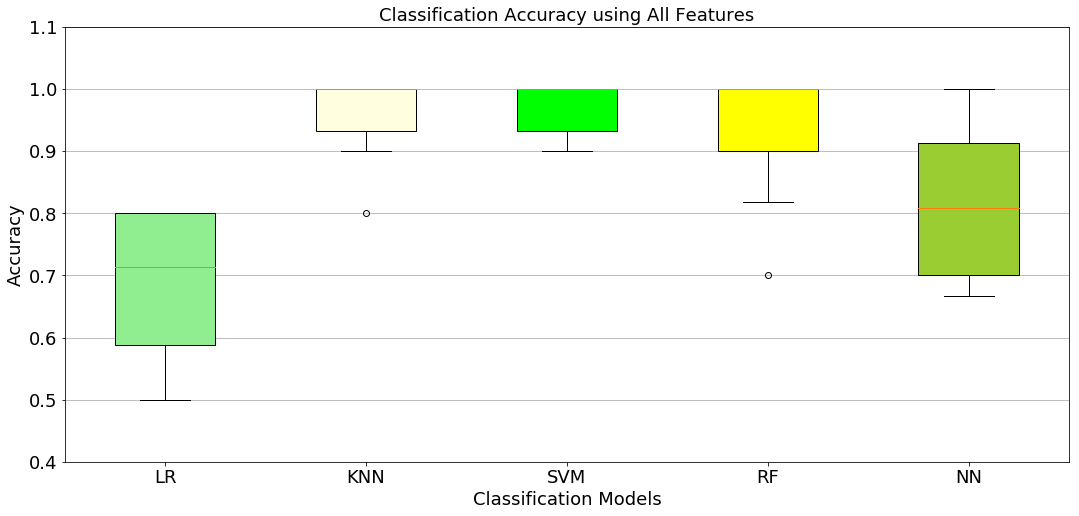

In [21]:
# BOXPLOT - visually comparing performance of the models
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'KNN', 'SVM', 'RF', 'NN'])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)

# Confusion Matrix

              precision    recall  f1-score   support

       other       0.96      0.96      0.96        27
  versicolor       0.94      0.94      0.94        18

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



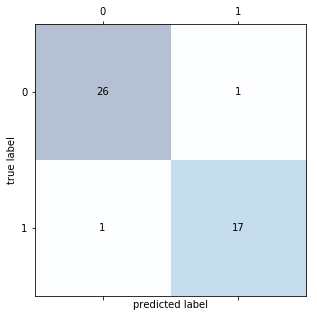

In [13]:
#Produce a Confusion Matrix to evaluate the model's performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["other", "versicolor"]))

### Train final model on FULL dataset (ALL Training and Test data combined)

In [ ]:
from sklearn.externals import joblib

# scale/standardize X (the original full dataset)
X_std = stdsc.fit_transform(X)

forest.fit(X_std, y)

# save the model to disk
joblib.dump(forest, 'final_forest_model.sav')
 
# load the model from disk
forest_from_saved = joblib.load('final_forest_model.sav')

# use the model as before
predictions = forest_from_saved.predict(X_new_customers)